Kształt danych po wczytaniu: (10000, 2)
Liczba punktów: 10000
Środek danych (średnia):
[1.04165751 1.52936676]

Wartości osobliwe (S): [2.02138212 1.00725499]
Macierz wektorów osobliwych U (główne kierunki):
[[-0.49819844 -0.86706304]
 [-0.86706304  0.49819844]]
Wariancje wzdłuż osi głównych: [4.08598567 1.01456262]

Kąt obrotu pierwszej osi głównej względem osi x: -2.0923 rad (-119.88°)


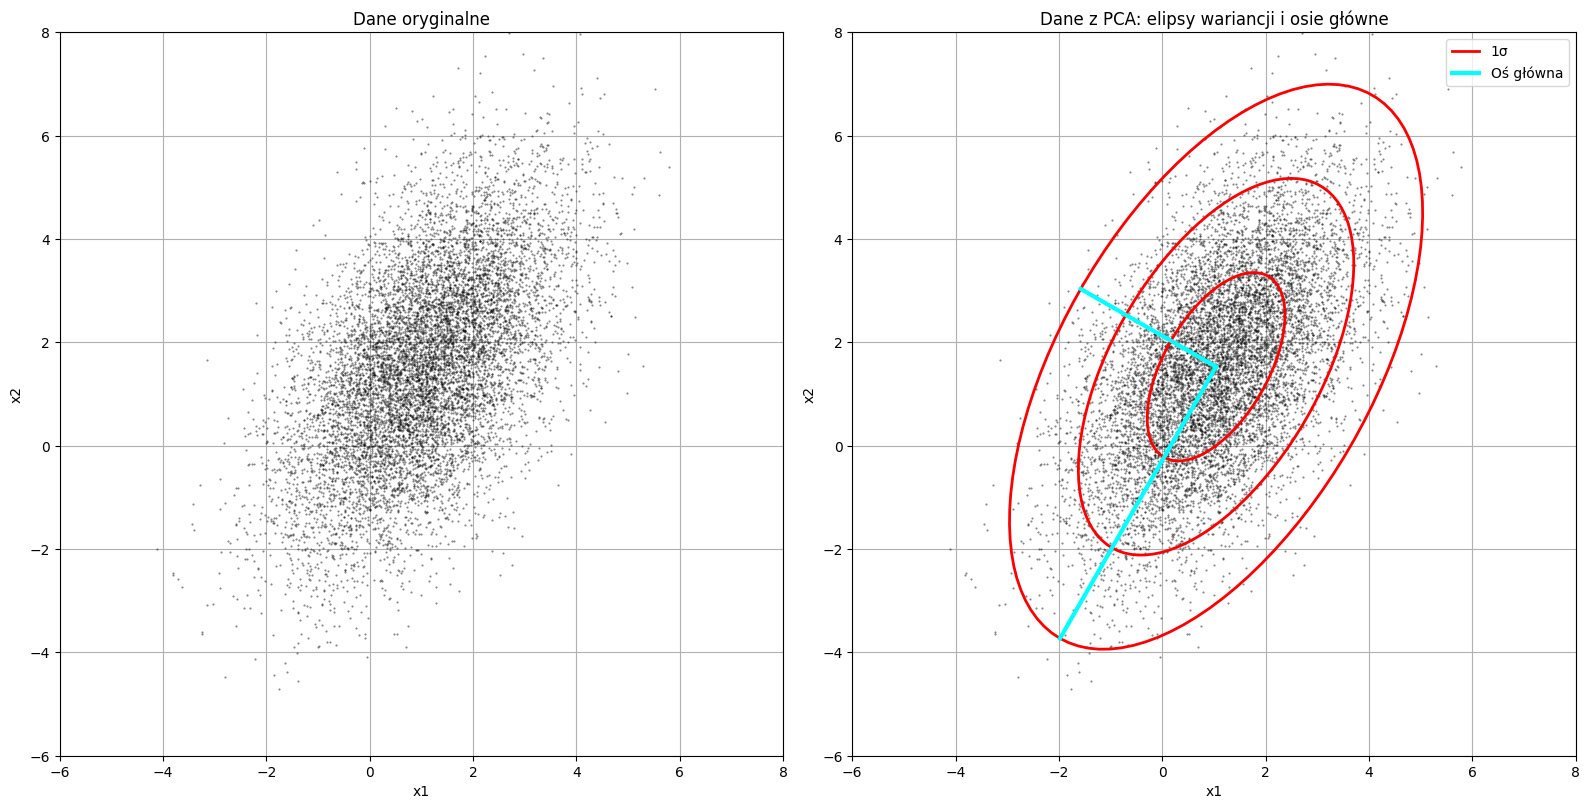


PODSUMOWANIE:
Środek danych: [1.0417, 1.5294]
Wariancje wzdłuż osi głównych: 4.0860, 1.0146
Kierunek pierwszej osi głównej (wektor): [-0.4982, -0.8671]
Kąt obrotu osi głównej: -119.88°
Procent wariancji wyjaśniony przez pierwszą składową: 80.11%


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['figure.figsize'] = [16, 8]

# ==================== 1. Wczytanie danych ====================
df = pd.read_csv('13-fix.csv', header=None, sep=';', decimal=',')
X = df.values
if X.shape[0] == 2:
    X = X.T 
else:
    X = X
print(f"Kształt danych po wczytaniu: {X.shape}")
X = X.T 
nPoints = X.shape[1]
print(f"Liczba punktów: {nPoints}")

# ==================== 2. Obliczenie średniej i centrowanie ====================
Xavg = np.mean(X, axis=1, keepdims=True)
print(f"Środek danych (średnia):\n{Xavg.flatten()}")
B = X - Xavg

# ==================== 3. SVD / PCA ====================
# SVD na macierzy B (dane wycentrowane), skalowane przez sqrt(n-1) jak w PCA
U, S, VT = np.linalg.svd(B / np.sqrt(nPoints - 1), full_matrices=False)

print(f"\nWartości osobliwe (S): {S}")
print(f"Macierz wektorów osobliwych U (główne kierunki):")
print(U)
print(f"Wariancje wzdłuż osi głównych: {S**2}")

# ==================== 4. Wyznaczenie kąta obrotu ====================
# Kąt obrotu pierwszej osi głównej (U[:,0]) względem osi x
angle_rad = np.arctan2(U[1, 0], U[0, 0])
angle_deg = np.degrees(angle_rad)
print(f"\nKąt obrotu pierwszej osi głównej względem osi x: {angle_rad:.4f} rad ({angle_deg:.2f}°)")

# ==================== 5. Wizualizacja ====================
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(X[0, :], X[1, :], '.', color='k', markersize=1, alpha=0.5)
ax1.set_xlim((-6, 8))
ax1.set_ylim((-6, 8))
ax1.set_aspect('equal')
ax1.grid(True)
ax1.set_title('Dane oryginalne')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')

# Wykres z PCA
ax2 = fig.add_subplot(122)
ax2.plot(X[0, :], X[1, :], '.', color='k', markersize=1, alpha=0.5)
ax2.set_xlim((-6, 8))
ax2.set_ylim((-6, 8))
ax2.set_aspect('equal')
ax2.grid(True)
ax2.set_title('Dane z PCA: elipsy wariancji i osie główne')
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')

# Rysowanie elips wariancji (1, 2, 3 odchylenia standardowe)
theta_circle = np.linspace(0, 2 * np.pi, 100)
for k in [1, 2, 3]:
    ellipse = U @ np.diag(S * k) @ np.array([np.cos(theta_circle), np.sin(theta_circle)])
    ax2.plot(Xavg[0, 0] + ellipse[0, :], Xavg[1, 0] + ellipse[1, :], 
             '-', color='red', linewidth=2, label=f'{k}σ' if k == 1 else "")

# Rysowanie osi głównych (wektory U[:,0] i U[:,1] przeskalowane przez S)
for i in range(2):
    ax2.plot([Xavg[0, 0], Xavg[0, 0] + U[0, i] * S[i] * 3],
             [Xavg[1, 0], Xavg[1, 0] + U[1, i] * S[i] * 3],
             '-', color='cyan', linewidth=3, label='Oś główna' if i == 0 else "")

ax2.legend()
plt.tight_layout()
plt.show()

# ==================== 6. Podsumowanie wyników ====================
print("\n" + "="*50)
print("PODSUMOWANIE:")
print(f"Środek danych: [{Xavg[0,0]:.4f}, {Xavg[1,0]:.4f}]")
print(f"Wariancje wzdłuż osi głównych: {S[0]**2:.4f}, {S[1]**2:.4f}")
print(f"Kierunek pierwszej osi głównej (wektor): [{U[0,0]:.4f}, {U[1,0]:.4f}]")
print(f"Kąt obrotu osi głównej: {angle_deg:.2f}°")
print(f"Procent wariancji wyjaśniony przez pierwszą składową: {100 * S[0]**2 / (S[0]**2 + S[1]**2):.2f}%")